In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
path = r'/cxnfs/Mark/Data/cleaned_data/'
df = pd.read_csv(r'/cxnfs/Mark/Data/complete_data.csv', index_col = 0, parse_dates =  True)
#cleaned data
pm10 = pd.read_csv(path+'pm10_cleaned.csv', index_col = 0, parse_dates = True)
pm25 = pd.read_csv(path+'pm25_cleaned.csv', index_col = 0, parse_dates = True)
pm1 = pd.read_csv(path+'pm1_cleaned.csv', index_col = 0, parse_dates = True)
#storing PM data in a dataframe along with other variables
data = pd.DataFrame()
data.index = df.index
data['pm10'] = pm10.iloc[:,0]
data['pm25'] = pm25.iloc[:,0]
data['pm1'] = pm1.iloc[:,0]
data['windspeed'] = df[' Windspeed (m/s)']
data['wind_dir'] = df[' WindDirect (Degr)']
prepandemic_data = data['2020-02-01':'2020-03-09']
prepandemic_data = prepandemic_data.dropna(how = 'any', axis = 'rows')
# #classes were suspended last March 10, 2020 to March 14, 2020
ecq_data = data['2020-03-17':'2020-05-15'] #start of lockdown until end of ECQ
ecq_data = ecq_data.dropna(how = 'any', axis = 'rows')



In [3]:
prepandemic_data.dropna().wind_dir.describe()

count    54645.000000
mean       119.346904
std        119.045261
min          0.000000
25%          0.000000
50%         99.000000
75%        218.000000
max        359.001000
Name: wind_dir, dtype: float64

In [4]:
prepandemic_data.dropna().windspeed.describe()

count    54645.000000
mean         0.521634
std          0.591976
min          0.000000
25%          0.000000
50%          0.413000
75%          0.765000
max          6.673000
Name: windspeed, dtype: float64

In [5]:
ecq_data.dropna().windspeed.describe().to_frame()


,windspeed
count,85854.000000
mean,0.492570
std,0.540809
min,0.000000
25%,0.000000
50%,0.404000
75%,0.734000
max,5.099000


In [6]:
ecq_data.dropna().windspeed.describe().to_frame().style.to_latex()

'\\begin{tabular}{lr}\n & windspeed \\\\\ncount & 85854.000000 \\\\\nmean & 0.492570 \\\\\nstd & 0.540809 \\\\\nmin & 0.000000 \\\\\n25% & 0.000000 \\\\\n50% & 0.404000 \\\\\n75% & 0.734000 \\\\\nmax & 5.099000 \\\\\n\\end{tabular}\n'

In [7]:
ecq_data.dropna().wind_dir.describe()

count    85854.000000
mean       108.608370
std        114.727218
min          0.000000
25%          0.000000
50%         80.000000
75%        191.000000
max        359.001000
Name: wind_dir, dtype: float64

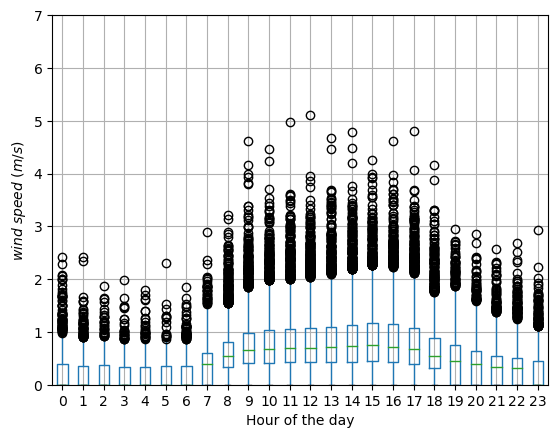

In [8]:
ecq_data[['windspeed']].groupby(by = ecq_data.index.hour).boxplot(subplots = False, rot = 0)
plt.xticks(np.arange(1,25), np.arange(0,24))
plt.ylabel('$wind~speed~(m/s)$')
plt.xlabel('Hour of the day')
plt.ylim(0,7)
plt.show()

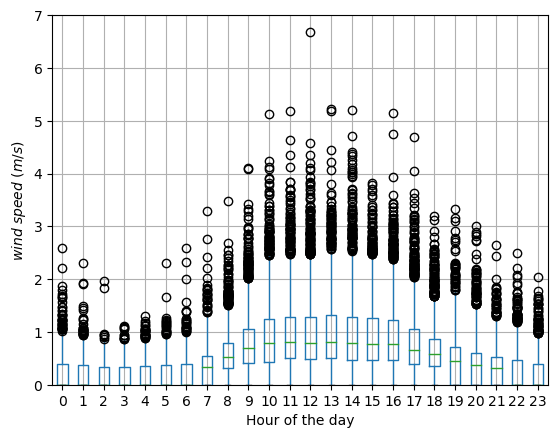

In [9]:
prepandemic_data[['windspeed']].groupby(by = prepandemic_data.index.hour).boxplot(subplots = False, rot = 0)
plt.xticks(np.arange(1,25), np.arange(0,24))
plt.ylabel('$wind~speed~(m/s)$')
plt.xlabel('Hour of the day')
plt.ylim(0,7)
plt.show()

## Prepandemic PM10 hourly boxplots

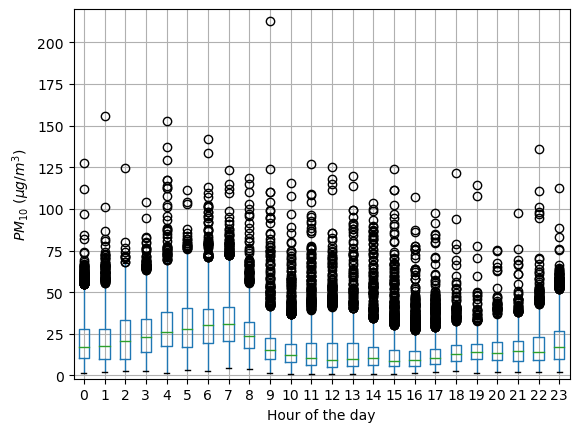

In [10]:
prepandemic_data[['pm10']].groupby(by = prepandemic_data.index.hour).boxplot(subplots = False, rot = 0)
plt.xticks(np.arange(1,25), np.arange(0,24))
plt.ylabel('$PM_{10}~(\mu g/m^3)$')
plt.xlabel('Hour of the day')
plt.ylim(-2,220)
plt.show()

## Pandemic PM10 hourly boxplots

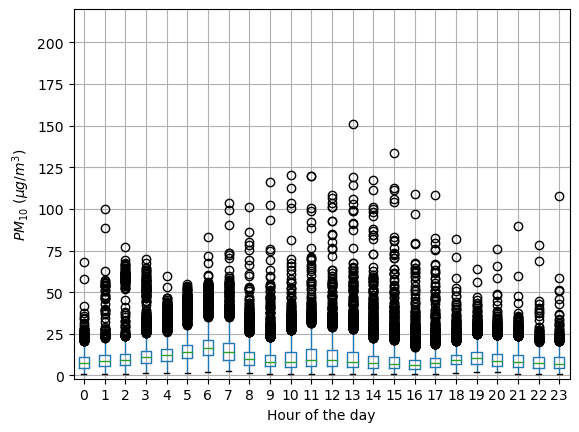

In [11]:
ecq_data[['pm10']].groupby(by = ecq_data.index.hour).boxplot(subplots = False, rot = 0)
plt.xticks(np.arange(1,25), np.arange(0,24))
plt.ylabel('$PM_{10}~(\mu g/m^3)$')
plt.xlabel('Hour of the day')
plt.ylim(-2,220)
plt.show()

## Prepandemic PM2.5 hourly boxplots

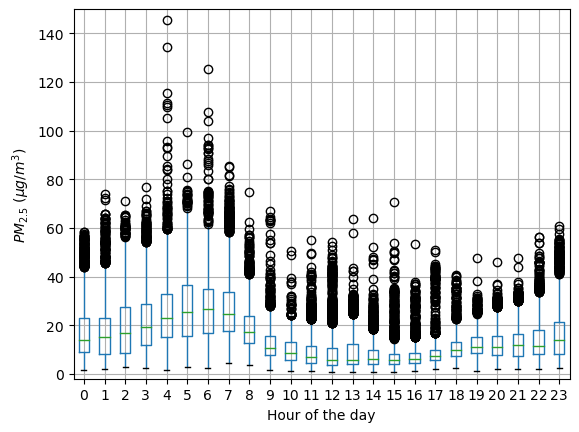

In [12]:
prepandemic_data[['pm25']].groupby(by = prepandemic_data.index.hour).boxplot(subplots = False, rot = 0)
plt.xticks(np.arange(1,25), np.arange(0,24))
plt.ylabel('$PM_{2.5}~(\mu g/m^3)$')
plt.xlabel('Hour of the day')
plt.ylim(-2,150)
plt.show()

## Pandemic PM2.5 hourly boxplots

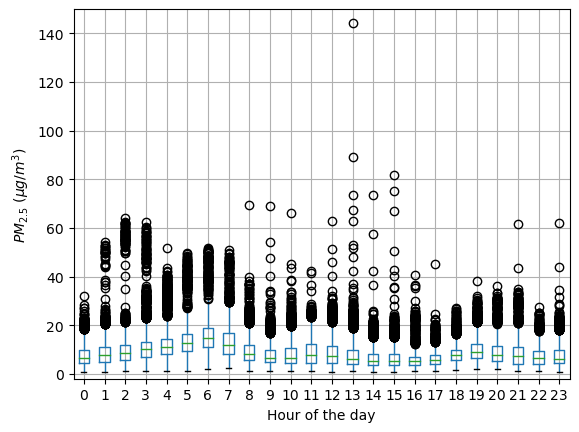

In [13]:
ecq_data[['pm25']].groupby(by = ecq_data.index.hour).boxplot(subplots = False, rot = 0)
plt.xticks(np.arange(1,25), np.arange(0,24))
plt.ylabel('$PM_{2.5}~(\mu g/m^3)$')
plt.xlabel('Hour of the day')
plt.ylim(-2,150)
plt.show()

## prepandemic pm1 hourly boxplots

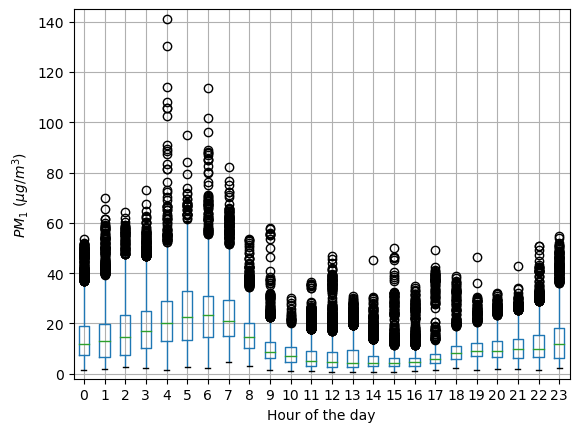

In [14]:
prepandemic_data[['pm1']].groupby(by = prepandemic_data.index.hour).boxplot(subplots = False, rot = 0)
plt.xticks(np.arange(1,25), np.arange(0,24))
plt.ylabel('$PM_{1}~(\mu g/m^3)$')
plt.xlabel('Hour of the day')
plt.ylim(-2,145)
plt.show()

## pandemic pm1 hourly boxplots

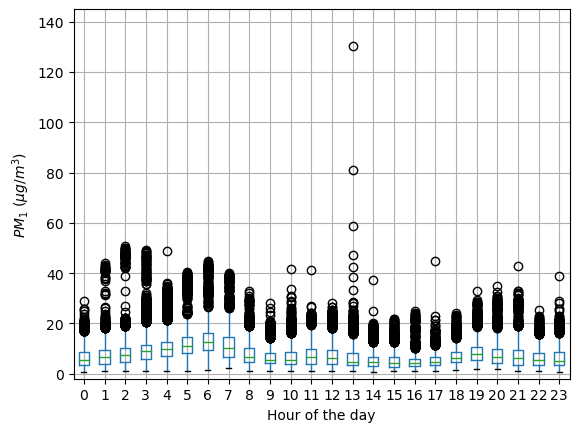

In [15]:
ecq_data[['pm1']].groupby(by = ecq_data.index.hour).boxplot(subplots = False, rot = 0)
plt.xticks(np.arange(1,25), np.arange(0,24))
plt.ylabel('$PM_{1}~(\mu g/m^3)$')
plt.xlabel('Hour of the day')
plt.ylim(-2,145)
plt.show()

## Creating joyplots as 2D histograms

In [16]:
#creating new dataframes to acount for all seconds in its index
prepandemic_data_1 = pd.DataFrame(columns = ['pm10', 'pm25', 'pm1'], index = pd.date_range('2020-02-01 00:00:00', '2020-03-09 23:59:59', freq = 's'))
ecq_data_1 = pd.DataFrame(columns = ['pm10', 'pm25', 'pm1'], index = pd.date_range('2020-03-15 00:00:00', '2020-05-15 15:59:59', freq = 's'))

for col in ['pm10', 'pm25', 'pm1']:
    prepandemic_data_1[col]  = prepandemic_data[col]
    ecq_data_1[col] = ecq_data[col]

In [17]:
#creating dataframes such that index refer to seconds and columns refer to a particular day
prepandemic_day_pm25_df = pd.DataFrame(columns = ['Feb_'+ str(n) for n in np.arange(1, 30)]+['Mar_'+str(m) for m in range(1, 10)], index = np.arange(1, (24*60*60)+1, 1))
prepandemic_day_pm10_df = pd.DataFrame(columns = ['Feb_'+ str(n) for n in np.arange(1, 30)]+['Mar_'+str(m) for m in range(1, 10)], index = np.arange(1, (24*60*60)+1, 1))
prepandemic_day_pm1_df = pd.DataFrame(columns = ['Feb_'+ str(n) for n in np.arange(1, 30)]+['Mar_'+str(m) for m in range(1, 10)], index = np.arange(1, (24*60*60)+1, 1))



In [18]:
for day in np.arange(1, 30, 1):
    prepandemic_day_pm25_df['Feb_'+str(day)] = prepandemic_data_1.pm25['2020-02-'+str(day):'2020-02-'+str(day)].to_numpy()
for day in np.arange(1, 10,1):
    prepandemic_day_pm25_df['Mar_'+str(day)] = prepandemic_data_1.pm25['2020-03-'+str(day):'2020-03-'+str(day)].to_numpy()
    
for day in np.arange(1, 30, 1):
    prepandemic_day_pm10_df['Feb_'+str(day)] = prepandemic_data_1.pm10['2020-02-'+str(day):'2020-02-'+str(day)].to_numpy()
for day in np.arange(1, 10,1):
    prepandemic_day_pm10_df['Mar_'+str(day)] = prepandemic_data_1.pm10['2020-03-'+str(day):'2020-03-'+str(day)].to_numpy()
    
for day in np.arange(1, 30, 1):
    prepandemic_day_pm1_df['Feb_'+str(day)] = prepandemic_data_1.pm1['2020-02-'+str(day):'2020-02-'+str(day)].to_numpy()
for day in np.arange(1, 10,1):
    prepandemic_day_pm1_df['Mar_'+str(day)] = prepandemic_data_1.pm1['2020-03-'+str(day):'2020-03-'+str(day)].to_numpy()


In [19]:
ecq_day_pm25_df = pd.DataFrame(columns = ['Mar_'+str(m) for m in range(15, 32)] + ['Apr_'+str(m) for m in range(1, 31)] + ['May_'+str(m) for m in range(1, 16)], index = np.arange(1, (24*60*60)+1, 1))
ecq_day_pm10_df = pd.DataFrame(columns = ['Mar_'+str(m) for m in range(15, 32)] + ['Apr_'+str(m) for m in range(1, 31)] + ['May_'+str(m) for m in range(1, 16)], index = np.arange(1, (24*60*60)+1, 1))
ecq_day_pm1_df = pd.DataFrame(columns = ['Mar_'+str(m) for m in range(15, 32)] + ['Apr_'+str(m) for m in range(1, 31)] + ['May_'+str(m) for m in range(1, 16)], index = np.arange(1, (24*60*60)+1, 1))

In [20]:
for day in np.arange(15, 32, 1):
    ecq_day_pm25_df['Mar_'+str(day)] = ecq_data_1.pm25['2020-03-'+str(day):'2020-03-'+str(day)].to_numpy()
for day in np.arange(1, 31,1):
    ecq_day_pm25_df['Apr_'+str(day)] = ecq_data_1.pm25['2020-04-'+str(day):'2020-04-'+str(day)].to_numpy()
for day in np.arange(1, 15,1):
    ecq_day_pm25_df['May_'+str(day)] = ecq_data_1.pm25['2020-05-'+str(day):'2020-05-'+str(day)].to_numpy()
    

for day in np.arange(15, 32, 1):
    ecq_day_pm10_df['Mar_'+str(day)] = ecq_data_1.pm10['2020-03-'+str(day):'2020-03-'+str(day)].to_numpy()
for day in np.arange(1, 31,1):
    ecq_day_pm10_df['Apr_'+str(day)] = ecq_data_1.pm10['2020-04-'+str(day):'2020-04-'+str(day)].to_numpy()
for day in np.arange(1, 15,1):
    ecq_day_pm10_df['May_'+str(day)] = ecq_data_1.pm10['2020-05-'+str(day):'2020-05-'+str(day)].to_numpy()
    
for day in np.arange(15, 32, 1):
    ecq_day_pm1_df['Mar_'+str(day)] = ecq_data_1.pm1['2020-03-'+str(day):'2020-03-'+str(day)].to_numpy()
for day in np.arange(1, 31,1):
    ecq_day_pm1_df['Apr_'+str(day)] = ecq_data_1.pm1['2020-04-'+str(day):'2020-04-'+str(day)].to_numpy()
for day in np.arange(1, 15,1):
    ecq_day_pm1_df['May_'+str(day)] = ecq_data_1.pm1['2020-05-'+str(day):'2020-05-'+str(day)].to_numpy()


In [21]:
for col in prepandemic_day_pm25_df.columns:
    prepandemic_day_pm25_df[col] = prepandemic_day_pm25_df[col].apply(lambda x: (x-prepandemic_day_pm25_df[col].min()) / (prepandemic_day_pm25_df[col].max() - prepandemic_day_pm25_df[col].min()) 
                                           if pd.isnull(x) == False else np.nan)
    
for col in prepandemic_day_pm10_df.columns:
    prepandemic_day_pm10_df[col] = prepandemic_day_pm10_df[col].apply(lambda x: (x-prepandemic_day_pm10_df[col].min()) / (prepandemic_day_pm10_df[col].max() - prepandemic_day_pm10_df[col].min()) 
                                           if pd.isnull(x) == False else np.nan)

for col in prepandemic_day_pm1_df.columns:
    prepandemic_day_pm1_df[col] = prepandemic_day_pm1_df[col].apply(lambda x: (x-prepandemic_day_pm1_df[col].min()) / (prepandemic_day_pm1_df[col].max() - prepandemic_day_pm1_df[col].min()) 
                                           if pd.isnull(x) == False else np.nan)

In [22]:
for col in ecq_day_pm25_df.columns:
    ecq_day_pm25_df[col] = ecq_day_pm25_df[col].apply(lambda x: (x-ecq_day_pm25_df[col].min()) / (ecq_day_pm25_df[col].max() - ecq_day_pm25_df[col].min()) 
                                           if pd.isnull(x) == False else np.nan)
    
for col in ecq_day_pm10_df.columns:
    ecq_day_pm10_df[col] = ecq_day_pm10_df[col].apply(lambda x: (x-ecq_day_pm10_df[col].min()) / (ecq_day_pm10_df[col].max() - ecq_day_pm10_df[col].min()) 
                                           if pd.isnull(x) == False else np.nan)

for col in ecq_day_pm1_df.columns:
    ecq_day_pm1_df[col] = ecq_day_pm1_df[col].apply(lambda x: (x-ecq_day_pm1_df[col].min()) / (ecq_day_pm1_df[col].max() - ecq_day_pm1_df[col].min()) 
                                           if pd.isnull(x) == False else np.nan)

### PM2.5 prepandemic

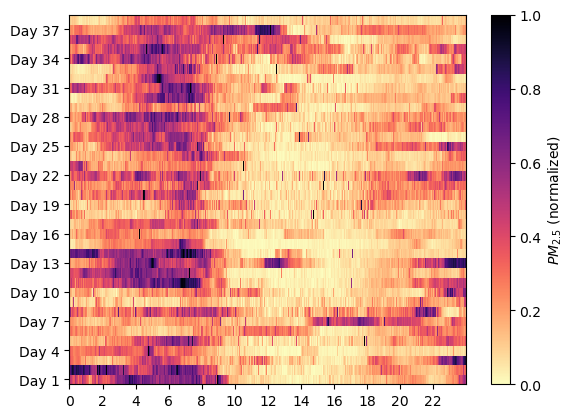

In [23]:
# pm2.5 -- prepandemic peak and min time of the day
x_bin = np.arange(0, (24*60*60)+1, 1)
y_bin = np.arange(0,39)
X, Y = np.meshgrid(x_bin, y_bin)
c = plt.pcolor(X,Y,prepandemic_day_pm25_df.T, cmap = 'magma_r')
cbar = plt.colorbar(c)
plt.xticks([3600*n for n in np.arange(0,24,2)], np.arange(0, 24, 2))
plt.yticks(np.arange(0.5, 39.5, 3), ['Day '+ str(n) for n in np.arange(1, 40,3)])
cbar.ax.set_ylabel('$PM_{2.5}$ (normalized)')
plt.show()

### PM2.5 pandemic

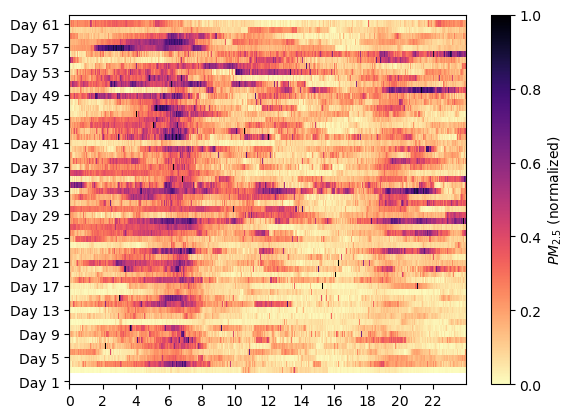

In [24]:
# pm2.5 -- ecq peak and min time of the day
x_bin = np.arange(0, (24*60*60)+1, 1)
y_bin = np.arange(63)
X, Y = np.meshgrid(x_bin, y_bin)
c = plt.pcolor(X,Y,ecq_day_pm25_df.T, cmap = 'magma_r')
cbar = plt.colorbar(c)
plt.xticks([3600*n for n in np.arange(0,24,2)], np.arange(0, 24, 2))
plt.yticks(np.arange(0.5, 64, 4), ['Day '+ str(n) for n in np.arange(1, 64,4)])
cbar.ax.set_ylabel('$PM_{2.5}$ (normalized)')
plt.show()

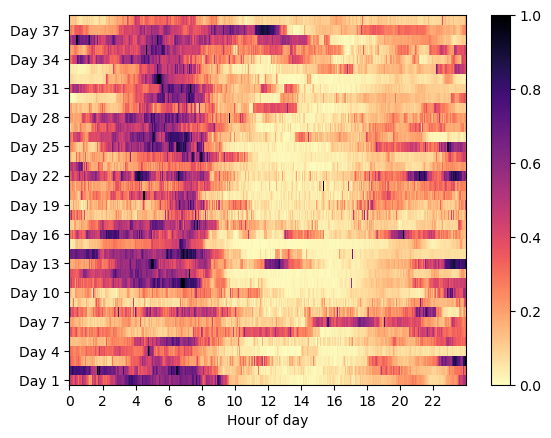

In [25]:
# pm1 -- prepandemic peak and min time of the day
x_bin = np.arange(0, (24*60*60)+1, 1)
y_bin = np.arange(39)
X, Y = np.meshgrid(x_bin, y_bin)
c = plt.pcolor(X,Y,prepandemic_day_pm1_df.T, cmap = 'magma_r')
cbar = plt.colorbar(c)
plt.xticks([3600*n for n in np.arange(0,24,2)], np.arange(0, 24, 2))
plt.yticks(np.arange(0.5, 39.5, 3), ['Day '+ str(n) for n in np.arange(1, 40,3)])
# cbar.ax.set_ylabel('$PM_{1}$ (normalized)')
plt.xlabel('Hour of day')
# plt.grid()
plt.show()

### PM1 prepandemic

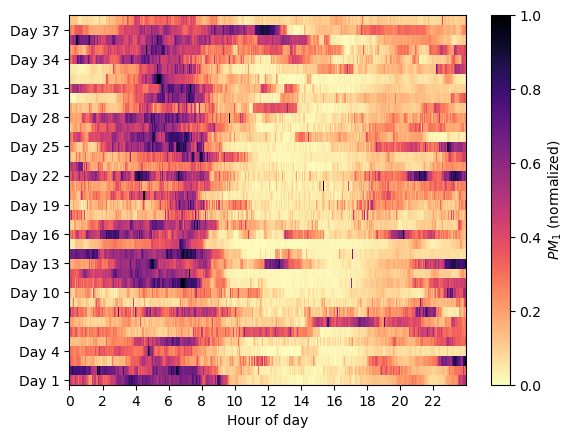

In [26]:
# pm1 -- prepandemic peak and min time of the day
x_bin = np.arange(0, (24*60*60)+1, 1)
y_bin = np.arange(39)
X, Y = np.meshgrid(x_bin, y_bin)
c = plt.pcolor(X,Y,prepandemic_day_pm1_df.T, cmap = 'magma_r')
cbar = plt.colorbar(c)
plt.xticks([3600*n for n in np.arange(0,24,2)], np.arange(0, 24, 2))
plt.yticks(np.arange(0.5, 39.5, 3), ['Day '+ str(n) for n in np.arange(1, 40,3)])
cbar.ax.set_ylabel('$PM_{1}$ (normalized)')
plt.xlabel('Hour of day')
plt.show()

### PM1 pandemic

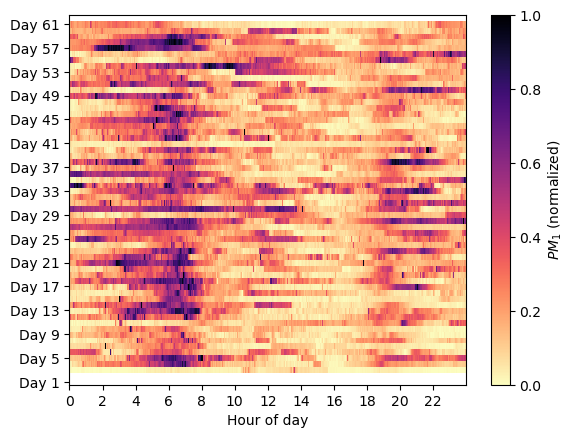

In [27]:
# pm1 -- ecq peak and min time of the day
x_bin = np.arange(0, (24*60*60)+1, 1)
y_bin = np.arange(63)
X, Y = np.meshgrid(x_bin, y_bin)
c = plt.pcolor(X,Y,ecq_day_pm1_df.T, cmap = 'magma_r')
cbar = plt.colorbar(c)
cbar.ax.set_ylabel('$PM_{1}$ (normalized)')
plt.xticks([3600*n for n in np.arange(0,24,2)], np.arange(0, 24, 2))
plt.yticks(np.arange(0.5, 64, 4), ['Day '+ str(n) for n in np.arange(1, 64,4)])
plt.xlabel('Hour of day')
plt.show()

### PM10 prepandemic

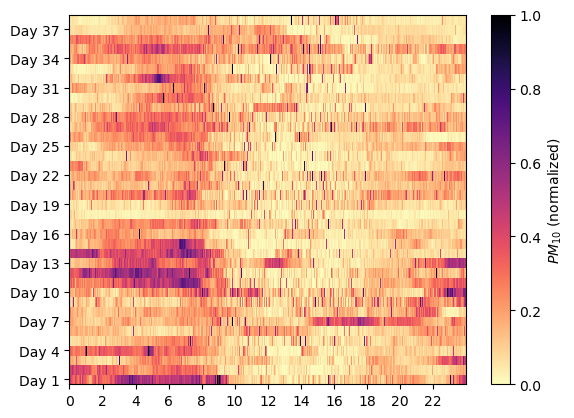

In [28]:
# pm10 -- prepandemic peak and min time of the day
x_bin = np.arange(0, (24*60*60)+1, 1)
y_bin = np.arange(39)
X, Y = np.meshgrid(x_bin, y_bin)
c = plt.pcolor(X,Y,prepandemic_day_pm10_df.T, cmap = 'magma_r')
cbar = plt.colorbar(c)
cbar.ax.set_ylabel('$PM_{10}$ (normalized)')
plt.xticks([3600*n for n in np.arange(0,24,2)], np.arange(0, 24, 2))
plt.yticks(np.arange(0.5, 39.5, 3), ['Day '+ str(n) for n in np.arange(1, 40,3)])
plt.show()

### PM10 pandemic

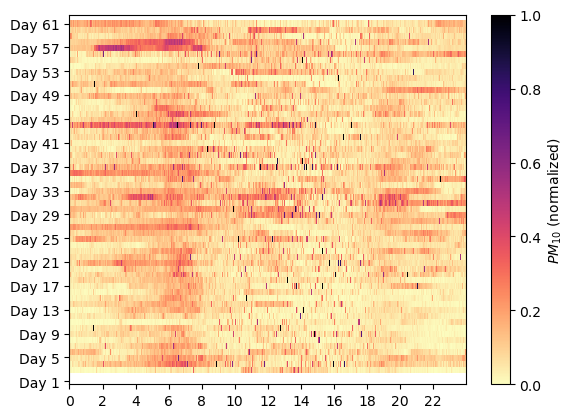

In [36]:
# pm10 -- ecq peak and min time of the day
x_bin = np.arange(0, (24*60*60)+1, 1)
y_bin = np.arange(63)
X, Y = np.meshgrid(x_bin, y_bin)
c = plt.pcolor(X,Y,ecq_day_pm10_df.T, cmap = 'magma_r')
cbar = plt.colorbar(c)
cbar.ax.set_ylabel('$PM_{10}$ (normalized)')
plt.xticks([3600*n for n in np.arange(0,24,2)], np.arange(0, 24, 2))
plt.yticks(np.arange(0.5, 64, 4), ['Day '+ str(n) for n in np.arange(1, 64,4)])
plt.show()